# **Housing Price Data Exploration Notebook**

## Objectives

This notebook addresses **Business Requirement 1** of the project: understanding the factors that influence house prices. To do this, we perform an exploratory data analysis (EDA) and correlation study to identify which features are most strongly related to the target variable `SalePrice`.

We aim to:
- Assess the structure and quality of the dataset
- Encode categorical variables appropriately
- Quantify the relationship between predictors and `SalePrice` using Pearson and Spearman correlation
- Visualize key patterns and trends
- Select features for use in modeling, based on statistical strength and visual insight

## Inputs

- `outputs/datasets/collection/house_prices_records.csv`

## Outputs

- Numeric summary and structure of the dataset
- Correlation tables using Pearson and Spearman methods
- Boxplots and scatter plots of the top correlated features
- A parallel categories plot to visualize multi-dimensional relationships



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with `os.getcwd()`

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Arthur\\OneDrive\\Documentos\\Code Institute\\PP5\\PP5-heritage-housing-issues-ml\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* `os.path.dirname()` gets the parent directory
* `os.chir()` defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Arthur\\OneDrive\\Documentos\\Code Institute\\PP5\\PP5-heritage-housing-issues-ml'

# Load Data

In [4]:
import pandas as pd

file_path = "outputs/datasets/collection/house_prices_records.csv"
df = pd.read_csv(file_path)
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

We are interested in learning more about the dataset. We want to check the type and distribution of variables, missing levels, and what these variables mean in a business context.

In [5]:
# Inspect types and nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Then we generate a Pandas Summary for all columns

In [6]:
summary = df.describe(include='all').transpose()
summary['missing_values'] = df.isnull().sum()
summary[['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing_values']]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
1stFlrSF,1460.0,NaN,NaN,NaN,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0,0
2ndFlrSF,1374.0,NaN,NaN,NaN,348.524017,438.865586,0.0,0.0,0.0,728.0,2065.0,86
BedroomAbvGr,1361.0,NaN,NaN,NaN,2.869214,0.820115,0.0,2.0,3.0,3.0,8.0,99
BsmtExposure,1422,4,No,953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
BsmtFinSF1,1460.0,NaN,NaN,NaN,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0,0
BsmtFinType1,1315,6,Unf,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145
BsmtUnfSF,1460.0,NaN,NaN,NaN,567.240411,441.866955,0.0,223.0,477.5,808.0,2336.0,0
EnclosedPorch,136.0,NaN,NaN,NaN,25.330882,66.684115,0.0,0.0,0.0,0.0,286.0,1324
GarageArea,1460.0,NaN,NaN,NaN,472.980137,213.804841,0.0,334.5,480.0,576.0,1418.0,0
GarageFinish,1225,3,Unf,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235


The summary shows the dataset has 24 features with a mix of numerical and categorical data. Key features such as `GrLivArea`, `TotalBsmtSF`, and `GarageArea` are fully populated and numeric, making them good candidates for modeling. Some variables, like `2ndFlrSF`, `BedroomAbvGr`, and `GarageYrBlt`, contain missing values that will require preprocessing. A few categorical features (e.g., `BsmtExposure`, `GarageFinish`, and `KitchenQual`) have a limited number of distinct values, which are suitable for encoding. Additionally, columns like `EnclosedPorch` and `WoodDeckSF` show a high number of missing entries, indicating they may be sparsely used or non-essential for all records.

This summary provides a strong foundation for selecting the most relevant variables for further analysis and preparing them appropriately.


## ProfileReport

In [7]:
from ydata_profiling import ProfileReport
from IPython.display import IFrame

# Create a profile report
profile = ProfileReport(df=df, minimal=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

## Prepare Variables for Correlation Study

To evaluate how different features relate to `SalePrice`, we need to ensure all variables are numeric. For that:
- **Ordinal variables** like `KitchenQual` will be mapped to ordered integers.
- **Nominal categorical variables** (like `BsmtExposure`, `GarageFinish`) will be one-hot encoded.
- **Missing values** must be handled before transformation.

Handle missing values in categorical columns

In [8]:
categorical_vars = ['BsmtExposure', 'GarageFinish', 'BsmtFinType1']
df[categorical_vars] = df[categorical_vars].fillna('Missing')

print("Number of missing values in each categorical column\n")
print(df[categorical_vars].isnull().sum())
print("\nCheck the first 20 rows of the categorical variables\n")
df[categorical_vars].head(20)

Number of missing values in each categorical column

BsmtExposure    0
GarageFinish    0
BsmtFinType1    0
dtype: int64

Check the first 20 rows of the categorical variables



,BsmtExposure,GarageFinish,BsmtFinType1
0,No,RFn,GLQ
1,Gd,RFn,ALQ
2,Mn,RFn,GLQ
3,No,Unf,ALQ
4,Av,RFn,GLQ
5,No,Unf,GLQ
6,Av,RFn,GLQ
7,Mn,Missing,ALQ
8,No,Unf,Unf
9,No,RFn,GLQ


Ordinal mapping for KitchenQual

In [9]:
qual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['KitchenQual'] = df['KitchenQual'].map(qual_map)


In [10]:
df['KitchenQual'].head(10)

0    4
1    3
2    4
3    4
4    4
5    3
6    4
7    3
8    3
9    3
Name: KitchenQual, dtype: int64

One-hot encoding nominal categorical variables

In [11]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=categorical_vars, drop_last=False)
df_encoded = encoder.fit_transform(df)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1stFlrSF              1460 non-null   int64  
 1   2ndFlrSF              1374 non-null   float64
 2   BedroomAbvGr          1361 non-null   float64
 3   BsmtFinSF1            1460 non-null   int64  
 4   BsmtUnfSF             1460 non-null   int64  
 5   EnclosedPorch         136 non-null    float64
 6   GarageArea            1460 non-null   int64  
 7   GarageYrBlt           1379 non-null   float64
 8   GrLivArea             1460 non-null   int64  
 9   KitchenQual           1460 non-null   int64  
 10  LotArea               1460 non-null   int64  
 11  LotFrontage           1201 non-null   float64
 12  MasVnrArea            1452 non-null   float64
 13  OpenPorchSF           1460 non-null   int64  
 14  OverallCond           1460 non-null   int64  
 15  OverallQual          

We now have the dataset represented with only numerical values

In [12]:
print("\nCheck the first 10 rows of the encoded categorical variables\n")
df_encoded.head(10)


Check the first 10 rows of the encoded categorical variables



,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,...,GarageFinish_Unf,GarageFinish_Missing,GarageFinish_Fin,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_Missing,BsmtFinType1_BLQ,BsmtFinType1_LwQ
0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,4,...,0,0,0,1,0,0,0,0,0,0
1,1262,0.0,3.0,978,284,NaN,460,1976.0,1262,3,...,0,0,0,0,1,0,0,0,0,0
2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,4,...,0,0,0,1,0,0,0,0,0,0
3,961,NaN,NaN,216,540,NaN,642,1998.0,1717,4,...,1,0,0,0,1,0,0,0,0,0
4,1145,NaN,4.0,655,490,0.0,836,2000.0,2198,4,...,0,0,0,1,0,0,0,0,0,0
5,796,566.0,1.0,732,64,NaN,480,1993.0,1362,3,...,1,0,0,1,0,0,0,0,0,0
6,1694,0.0,3.0,1369,317,NaN,636,2004.0,1694,4,...,0,0,0,1,0,0,0,0,0,0
7,1107,983.0,3.0,859,216,NaN,484,1973.0,2090,3,...,0,1,0,0,1,0,0,0,0,0
8,1022,752.0,2.0,0,952,NaN,468,1931.0,1774,3,...,1,0,0,0,0,1,0,0,0,0
9,1077,0.0,2.0,851,140,NaN,205,1939.0,1077,3,...,0,0,0,1,0,0,0,0,0,0


Now the dataset contains numeric representations of all relevant features and is ready for correlation analysis.

---

# Correlation Study

We compute both **Pearson** (linear relationships) and **Spearman** (monotonic relationships) correlations.
We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with [1:]
We sort values considering the absolute value, by setting key=abs

Calculate Pearson correlation with SalePrice

In [13]:
corr_pearson = df_encoded.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
print("Top Pearson correlations with SalePrice:\n", corr_pearson.head(10))


Top Pearson correlations with SalePrice:
 OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64


Calculate Spearman correlation with `SalePrice`

In [14]:
corr_spearman = df_encoded.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
print("\nTop Spearman correlations with SalePrice:\n", corr_spearman.head(10))


Top Spearman correlations with SalePrice:
 OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64


## Select Top Correlated Variables

Instead of selecting a fixed number of top variables, we define a correlation threshold (≥ 0.5) and select all variables that meet or exceed this threshold in either Pearson or Spearman correlation. This allows us to retain variables with meaningful relationships to `SalePrice` while staying flexible.


In [15]:
corr_threshold = 0.5

Then we get the variables above this threshold

In [16]:
strong_pearson = corr_pearson[abs(corr_pearson) >= corr_threshold].index.tolist()
strong_spearman = corr_spearman[abs(corr_spearman) >= corr_threshold].index.tolist()

# Combine and remove duplicates
selected_vars = list(set(strong_pearson + strong_spearman))
print("Selected variables based on correlation threshold:\n", selected_vars)

Selected variables based on correlation threshold:
 ['KitchenQual', '1stFlrSF', 'OverallQual', 'GarageYrBlt', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'GrLivArea']


---

In [ ]:
import ppscore as pps
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Compute PPS matrix for the dataset
pps_matrix = pps.matrix(df_encoded)[['x', 'y', 'ppscore']]

# Filter for relationships where the target is SalePrice
pps_saleprice = pps_matrix[pps_matrix['y'] == 'SalePrice']

# Pivot the data for heatmap visualization
pps_pivot = pps_saleprice.pivot(index='x', columns='y', values='ppscore')


pps_pivot = pps_pivot.drop(index='SalePrice')

# Re-plot the heatmap without 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, annot=True, cmap='coolwarm', cbar=True)
plt.title('PPS Heatmap for Features with SalePrice as Target (Excluding SalePrice)', fontsize=14)
plt.xlabel('Target')
plt.ylabel('Feature')
plt.show()

# Compute the full PPS matrix for the dataset
pps_full_matrix = pps.matrix(df)

# Pivot the data for heatmap visualization
pps_full_pivot = pps_full_matrix.pivot(index='x', columns='y', values='ppscore')

# Remove squares with values <= 0
pps_full_pivot_filtered = pps_full_pivot[pps_full_pivot > 0.2]

# Re-plot the heatmap with filtered values
plt.figure(figsize=(15, 12))
sns.heatmap(pps_full_pivot_filtered, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('PPS Heatmap for All Features (Filtered, Annotated)', fontsize=16)
plt.xlabel('Target Features')
plt.ylabel('Predictor Features')
plt.show()

# EDA on Selected Variables

We visually inspect the relationship between each selected variable and the target (`SalePrice`).

We use boxplots for discrete ordinal features with a small number of levels (like `KitchenQual`), and scatterplots for continuous variables.

In [18]:
print(df[selected_vars].isnull().sum())

KitchenQual      0
1stFlrSF         0
OverallQual      0
GarageYrBlt     81
TotalBsmtSF      0
YearBuilt        0
YearRemodAdd     0
GarageArea       0
GrLivArea        0
dtype: int64


Plotting boxplot for KitchenQual vs SalePrice


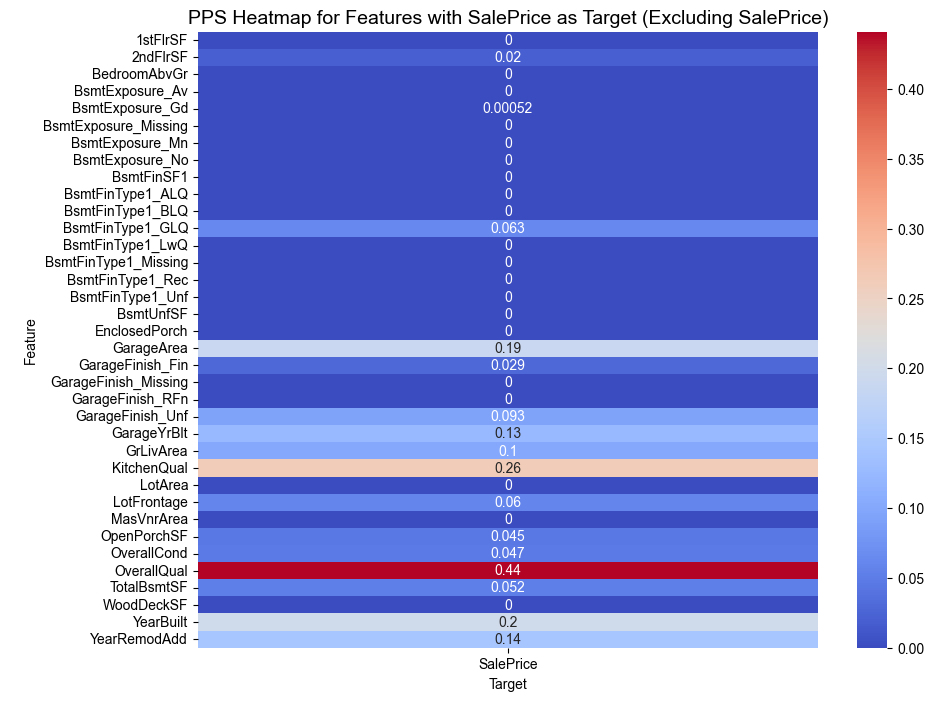

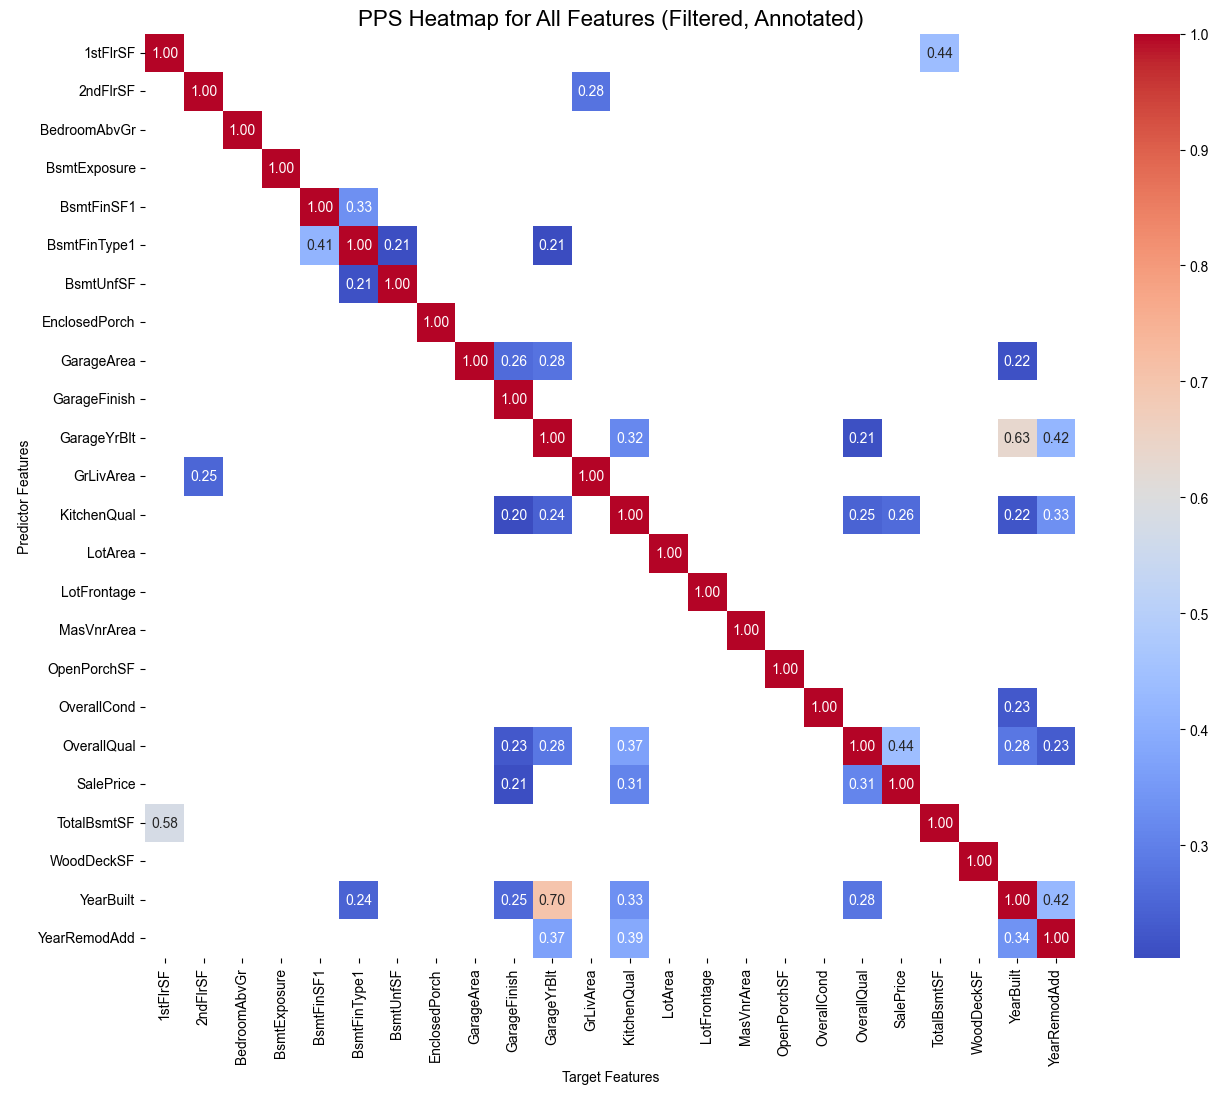

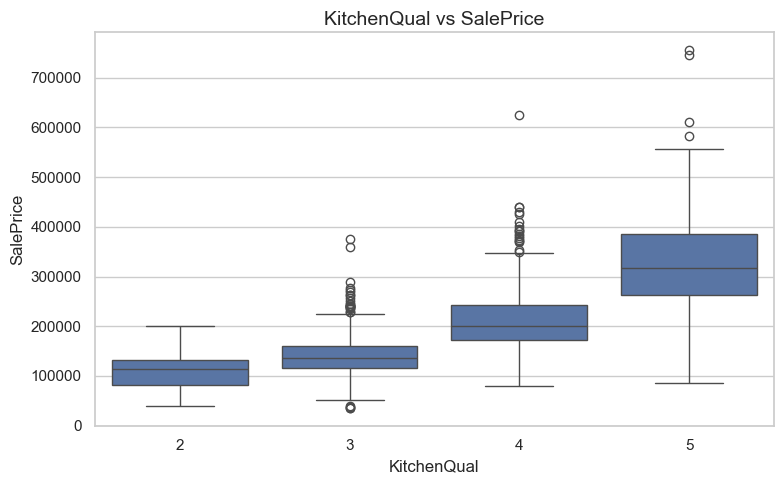

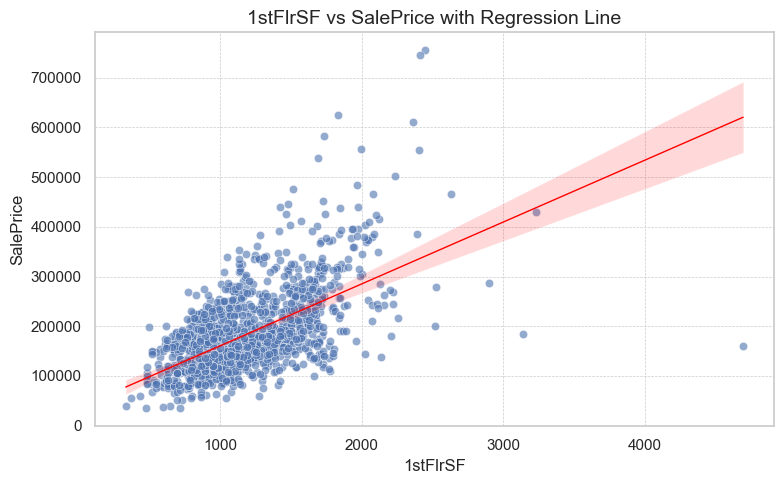

Plotting boxplot for OverallQual vs SalePrice


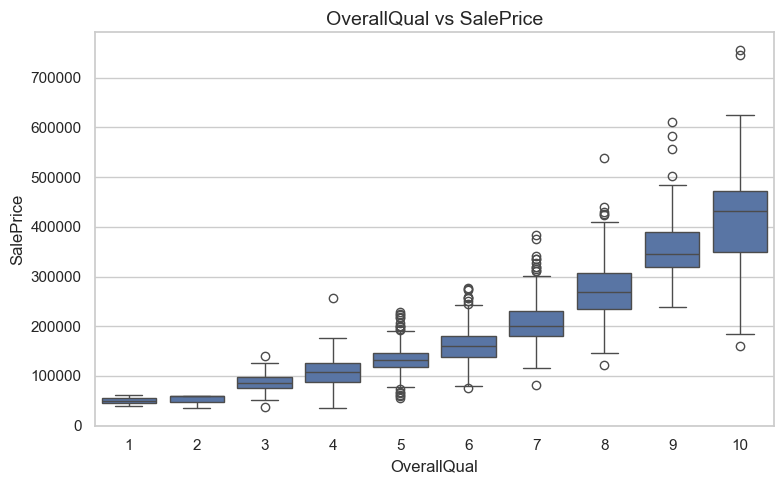

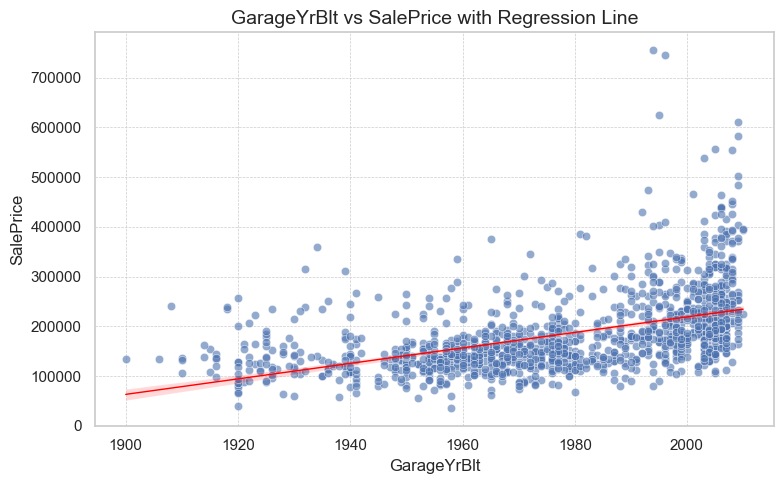

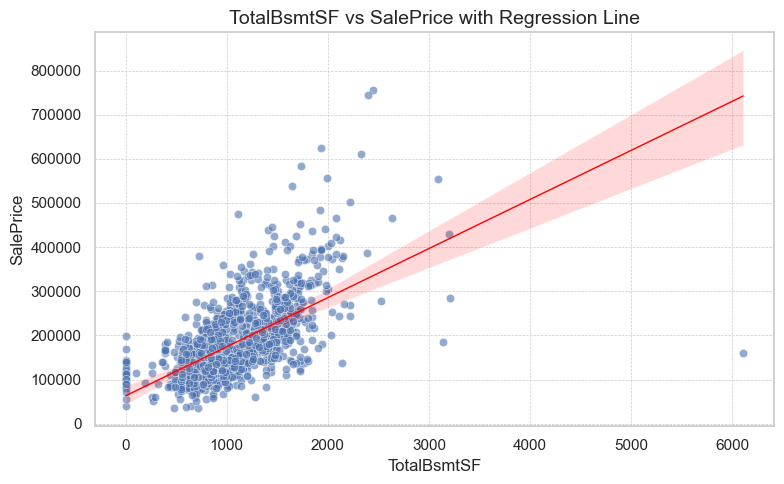

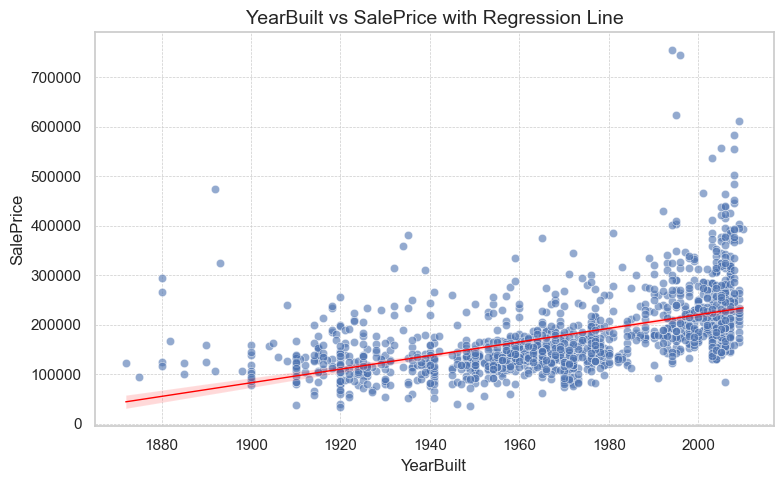

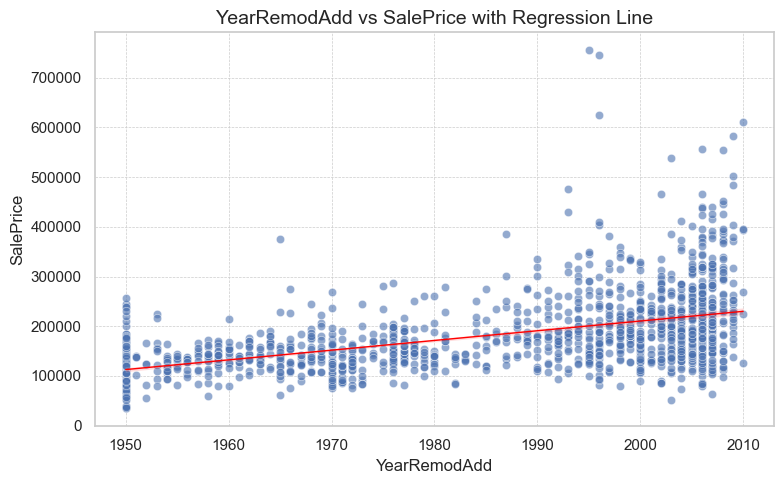

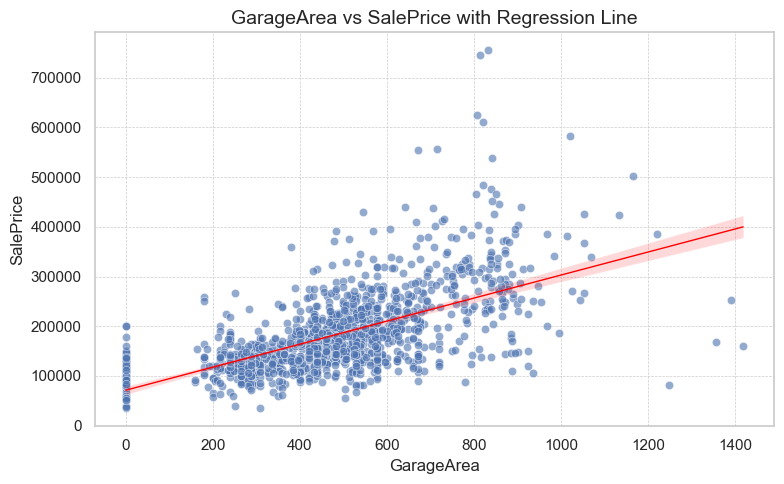

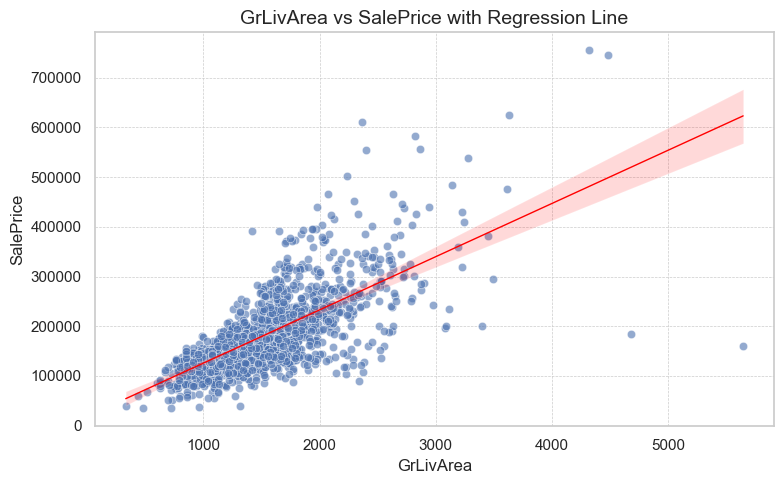

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

def plot_scatter(df, x, y):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='red', line_kws={"linewidth": 1})
    plt.title(f"{x} vs {y} with Regression Line", fontsize=14)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_box(df, x, y):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"{x} vs {y}", fontsize=14)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# Apply different plots depending on variable type or value range
for col in selected_vars:
    if df[col].nunique() <= 10:
        print(f"Plotting boxplot for {col} vs SalePrice")
        plot_box(df, col, 'SalePrice')
    else:
        plot_scatter(df, col, 'SalePrice')

# Parallel Plot with Binned Features

### Binning Key Numeric Features for Visualization

To improve interpretability in the parallel categories plot, we grouped continuous variables into meaningful ranges using `ArbitraryDiscretiser`:

- **`GrLivArea`**, **`GarageArea`**, **`TotalBsmtSF`**, and **`YearBuilt`** were binned into custom-defined intervals reflecting size or time periods.
- Each binned variable was then labeled using `pd.Categorical` to define a clear order for plotting.
- These bins simplify the visual structure and reduce clutter, allowing us to analyze house price trends across grouped feature ranges rather than individual raw values.

This step prepares the dataset for a cleaner, more insightful visualization of relationships between multiple housing attributes and `SalePrice`.

In [20]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
import pandas as pd

# Columns to bin (with source already defined as df_encoded)
df_binned = df_encoded[['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'SalePrice']].copy()

# Define binning dictionary
binning_dict = {
    'GrLivArea': [-np.inf, 1000, 1500, 2000, 2500, np.inf],
    'GarageArea': [-1, 300, 500, 700, np.inf],
    'TotalBsmtSF': [-np.inf, 500, 1000, 1500, np.inf],
    'YearBuilt': [1800, 1950, 1970, 1990, 2010, np.inf]
}

# Apply binning
disc = ArbitraryDiscretiser(binning_dict=binning_dict)
df_binned = disc.fit_transform(df_binned)

# Replace bin codes with readable labels using pd.Categorical
df_binned['GrLivArea'] = pd.Categorical(
    df_binned['GrLivArea'].replace({0: '<1000', 1: '1000-1500', 2: '1500-2000', 3: '2000-2500', 4: '2500+'}),
    categories=['<1000', '1000-1500', '1500-2000', '2000-2500', '2500+'],
    ordered=True
)

df_binned['GarageArea'] = pd.Categorical(
    df_binned['GarageArea'].replace({0: '<300', 1: '300-500', 2: '500-700', 3: '700+'}),
    categories=['<300', '300-500', '500-700', '700+'],
    ordered=True
)

df_binned['TotalBsmtSF'] = pd.Categorical(
    df_binned['TotalBsmtSF'].replace({0: '<500', 1: '500-1000', 2: '1000-1500', 3: '1500+'}),
    categories=['<500', '500-1000', '1000-1500', '1500+'],
    ordered=True
)

df_binned['YearBuilt'] = pd.Categorical(
    df_binned['YearBuilt'].replace({0: '<1950', 1: '1950-1970', 2: '1970-1990', 3: '1990-2010', 4: '2010+'}),
    categories=['<1950', '1950-1970', '1970-1990', '1990-2010', '2010+'],
    ordered=True
)


### Parallel Categories Plot (Aggregated by Median SalePrice)

In [21]:
import plotly.express as px
import plotly.io as pio

# Aggregate by combinations to get median SalePrice
agg_df = df_binned.groupby(
    ['GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF', 'YearBuilt'],
    observed=True
).agg({'SalePrice': 'median'}).reset_index()

# Create the parallel categories plot
pio.renderers.default = "notebook_connected"

fig = px.parallel_categories(
    agg_df,
    dimensions=['GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF', 'YearBuilt'],
    color="SalePrice",
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(margin=dict(l=100, r=100, t=50, b=50))
fig.show()

---

# Conclusions and Next Steps

We identified a set of variables with strong correlation to `SalePrice`, including `GrLivArea`, `OverallQual`, `GarageArea`, and `TotalBsmtSF`. These correlations suggest that **larger, higher-quality homes with substantial garage and basement space** tend to sell for more in the Ames housing market.

More specifically:
- Homes with **larger above-ground living areas** (`GrLivArea`) are associated with higher sale prices.
- Properties rated with a **higher overall quality of materials and finishes** (`OverallQual`) consistently show higher market value.
- Houses with **larger garage areas** (`GarageArea`) are more valuable — likely reflecting convenience, storage space, or multi-car capacity.
- A **larger basement area** (`TotalBsmtSF`) is also linked to increased sale price, suggesting that additional usable space adds value even if it’s not above ground.

These findings align with real-world expectations: buyers typically pay more for homes that are spacious, well-built, and offer additional amenities like large garages or basements.

- Variables with natural ordering (like `KitchenQual`) were encoded appropriately to preserve their meaning in correlation studies.
- Missing values were handled to enable encoding and correlation computations.
- Correlation was applied safely by selecting only numeric columns.
- Scatter plots confirmed positive linear or monotonic trends between these features and house prices.

**Next Steps:**
- Clean and preprocess the selected features (e.g., handle remaining missing values)
- Begin building and evaluating ML models for house price prediction (Business Requirement 2)
- Integrate insights and visuals into the Streamlit dashboard